In [1]:
%matplotlib inline

import torch
import numpy as np
import matplotlib.pyplot as plt
from utils import one_hot_label
from generate_data import generate_data
from modules import Dropout
from modules import Linear, Sequential
from modules.losses import LossMSE, LossSoftmaxCrossEntropy
from generate_data import generate_grid_data
from modules.activations import ReLU
from optimizers import SGD

ccenter: 
 0.5000
 0.5000
[torch.FloatTensor of size 2]



In [2]:
def plot_data(points, labels=0, minn=0, maxx=1, radius=1/np.sqrt(2*np.pi), center=np.array([0.5, 0.5])):
    circle = plt.Circle(center, radius, color='r', fill=False, linewidth=5)
    fig, ax = plt.subplots(figsize=(8, 8))
    ax.add_patch(circle)
    if torch.is_tensor(points):
        points = points.numpy()
    
    print("points: {} -- points: {}".format(type(points), points.shape))
    ax.scatter(points[:,0], points[:,1], c=labels)
    ax.set_xlim(minn, maxx)
    ax.set_ylim(minn, maxx)

In [3]:
def default_net_1(x_train, y_train, num_of_neurons=(2, 25, 25, 25, 2), lr=0.1, momentum_coef=0.0, num_of_epochs=100):
    ce = LossSoftmaxCrossEntropy()

    model = Sequential()
    model.add(Linear(out=num_of_neurons[1], input_size=num_of_neurons[0], activation='relu'))
    model.add(Linear(out=num_of_neurons[2], activation='relu'))
    model.add(Linear(out=num_of_neurons[2], activation='relu'))
    model.add(Dropout(prob=0.2))
    model.add(Linear(out=num_of_neurons[4]))

    model.loss = ce
    sgd = SGD(lr, momentum_coef, weight_decay=0.2)

    # TODO verbose
    sgd.train(model, x_train, y_train, num_of_epochs, val_split=0.2)

    return model

In [4]:
points, labels = generate_data(num_of_points=1000)
points, labels = generate_grid_data(num_of_points_per_dim=51)
print("Points: {} -- labels: {}".format(points.shape, labels.shape))

ccenter: 
 0.5000
 0.5000
[torch.FloatTensor of size 2]

Points: torch.Size([2601, 2]) -- labels: torch.Size([2601])


points: <class 'numpy.ndarray'> -- points: (2601, 2)


array([ 0.,  1.], dtype=float32)

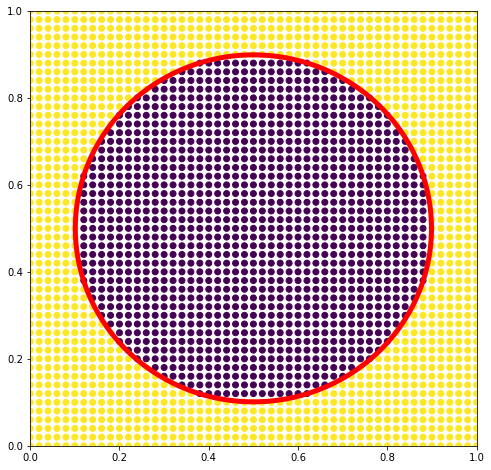

In [5]:
plot_data(points, labels)
np.unique(labels.numpy())

In [6]:
print(labels)


 1
 1
 1
⋮ 
 1
 1
 1
[torch.FloatTensor of size 2601]



In [7]:

labels = one_hot_label(labels, val=0)  # convert labels to 1-hot encoding

model = default_net_1(points, labels, num_of_epochs=5000)
loss1 = model.loss.loss_logging

print(loss1)

Added Module Name: 0_Linear 
Added Module Name: 1_ReLU 
Added Module Name: 2_Linear 
Added Module Name: 3_ReLU 
Added Module Name: 4_Linear 
Added Module Name: 5_ReLU 
Added Module Name: 6_Dropout 
Added Module Name: 7_Linear 
loss_out: 
 0.5757
 0.5682
 0.5669
   ⋮   
 0.8381
 0.5616
 0.5613
[torch.FloatTensor of size 2081]

LossOut: 
 0.7170
[torch.FloatTensor of size 1]
 -- type: <class 'torch.FloatTensor'>
loss_out: 
 0
 0
 0
⋮ 
 0
 0
 0
[torch.FloatTensor of size 2081]

LossOut: 
 0
[torch.FloatTensor of size 1]
 -- type: <class 'torch.FloatTensor'>
loss_out: 
 0.5836
 0.5597
 0.5617
 0.5570
 0.5698
 0.5989
 0.5854
 0.5663
 0.6073
 0.5675
 0.5614
 0.5649
 0.5649
 0.5728
 0.5585
 0.5634
 0.6132
 0.6078
 0.5541
 0.5607
 0.6018
 0.5647
 0.5638
 0.5835
 0.8289
 0.8405
 0.8480
 0.7898
 0.8227
 0.8245
 0.8401
 0.8528
 0.8502
 0.8457
 0.8429
 0.8344
 0.8430
 0.8536
 0.8431
 0.8482
 0.8311
 0.8177
 0.8392
 0.7880
 0.7893
 0.8341
 0.8450
 0.5675
 0.5898
 0.6085
 0.6182
 0.5639
 0.5807
 0.5

loss_out: 
 0.7062
 0.6236
 0.6147
 0.6194
 0.7060
 0.6141
 0.7973
 0.6251
 0.6979
 0.5747
 0.6990
 0.6315
 0.5920
 0.6983
 0.5869
 0.6983
 0.6784
 0.5636
 0.6375
 0.6697
 0.5619
 0.5953
 0.7050
 0.6252
 0.7376
 0.7574
 0.8137
 0.7678
 0.7727
 0.7672
 0.9014
 0.7641
 0.8171
 0.7707
 0.9019
 0.7373
 0.7698
 0.6842
 0.8519
 0.7587
 0.8207
 0.7769
 0.8125
 0.6793
 0.7653
 0.8577
 0.6916
 0.6162
 0.6243
 0.6185
 0.6236
 0.6147
 0.6158
 0.6141
 0.6140
 0.6138
 0.6275
 0.6134
 0.6304
 0.5434
 0.6128
 0.7123
 0.6901
 0.6747
 0.5657
 0.6981
 0.5978
 0.6208
 0.5634
 0.6298
 0.5568
 0.5901
 0.6287
 0.5875
 0.7054
 0.6204
 0.8131
 0.8831
 0.6757
 0.8134
 0.8138
 0.7709
 0.7514
 0.7666
 0.7645
 0.7606
 0.6044
 0.7701
 0.7709
 0.8542
 0.8445
 0.6935
 0.7419
 0.8639
 0.7752
 0.7757
 0.7309
 0.6246
 0.6158
 0.6196
 0.6150
 0.6859
 0.7054
 0.6138
 0.7017
 0.6916
 0.5743
 0.6188
 0.7051
 0.5768
 0.6124
 0.7876
 0.7070
 0.6368
 0.5948
 0.6287
 0.6388
 0.5673
 0.6350
 0.6271
 0.7055
 0.6340
 0.6205
 0.62

AssertionError: 

In [7]:
data, labels = generate_grid_data(minn=0, maxx=1, num_of_points_per_dim=51, is_torch=True)
model.print_model()

Name: 0_Linear
Name: 1_ReLU
Name: 2_Linear
Name: 3_ReLU
Name: 4_Linear
Name: 5_ReLU
Name: 6_Dropout
Name: 7_Linear


In [8]:
out1 = model.predict(data)
print(out1)


 0
 0
 0
⋮ 
 0
 0
 0
[torch.LongTensor of size 2601]



torch.Size([2601, 2])  --  torch.Size([2601])


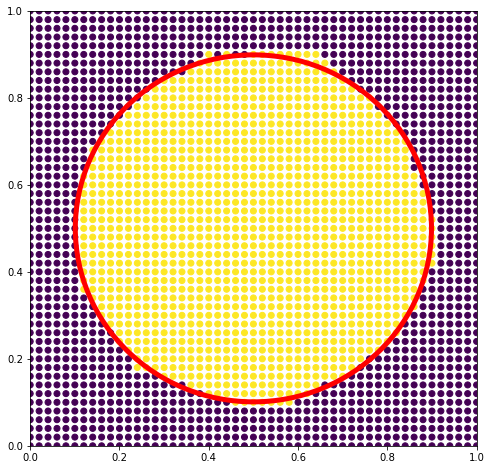

In [9]:
print(data.shape, " -- ", out1.shape)
plot_data(data, out1)

In [10]:
print(out1.shape, " -- ", data.shape)
model.evaluate(data, out1)

torch.Size([2601])  --  torch.Size([2601, 2])


0.9938485198000769